In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()
cancer_dataset.keys()

df = pd.DataFrame(cancer_dataset.data, columns=[cancer_dataset.feature_names])
df = df.assign(target=pd.Series(cancer_dataset.target))
df.head()
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [3]:
# count number of obvs in each class
pd.Series(cancer_dataset.target).value_counts()


1    357
0    212
dtype: int64

In [4]:
X = cancer_dataset["data"]
Y = cancer_dataset["target"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

#pd.Series(Y_test).value_counts()

(455, 30)
(114, 30)
(455,)
(114,)


In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
predictions = model.predict(X_test)

In [11]:
from sklearn import metrics

print('\nConfusion Matrix:')
metrics.confusion_matrix(Y_test, predictions)


Confusion Matrix:


array([[38,  4],
       [ 2, 70]])

In [12]:
from sklearn import metrics

print('Accuracy Score:', metrics.accuracy_score(Y_test, predictions))
print('Precision Score:', metrics.precision_score(Y_test, predictions))
print('Recall Score:', metrics.recall_score(Y_test, predictions))
print('F1 Score:', metrics.f1_score(Y_test, predictions))



Accuracy Score: 0.9473684210526315
Precision Score: 0.9459459459459459
Recall Score: 0.9722222222222222
F1 Score: 0.9589041095890412


In [14]:
from sklearn.metrics import roc_curve

#decision_values = model.decision_function(X_test);
probabilities = model.predict_proba(X_test)[:,1]

#print('ROC-AUC Score from decision_function:', metrics.roc_auc_score(Y_test, decision_values))
print('ROC-AUC Score from probablilities:', metrics.roc_auc_score(Y_test, probabilities))

ROC-AUC Score from probablilities: 0.992063492063492


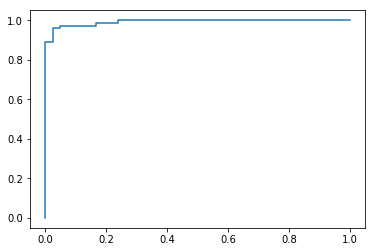

AUC Score: 0.992063492063492

1.9998300683346744 0.0
0.9998300683346744 0.013888888888888888
0.8744318949518954 0.8888888888888888
0.8511547246427549 0.865079365079365
0.6326878737256969 0.9345238095238095
0.6189343282661495 0.9107142857142858
0.5707760464183583 0.9246031746031746
0.3278851157948678 0.8055555555555556
0.17115872087372808 0.8194444444444445
0.09894375164600669 0.748015873015873
0.058657003771167705 0.7619047619047619
5.810017676523514e-20 0.0

 Threshold with max tpr-fpr : 0.6326878737256969


In [16]:
fpr, tpr, thresholds = roc_curve(Y_test, probabilities)

plt.plot(fpr,tpr)
plt.show() 

print('AUC Score:', metrics.auc(fpr, tpr))
print('')

for i in range(len(thresholds)):
    print(thresholds[i],tpr[i]-fpr[i])


print('\n Threshold with max tpr-fpr :', thresholds[np.argmax(tpr - fpr)])


In [17]:
decisions = (probabilities >= thresholds[np.argmax(tpr - fpr)]).astype(int)
metrics.confusion_matrix(Y_test, decisions)

array([[41,  1],
       [ 3, 69]])